In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pySMOKEPostProcessor import PostProcessor
from pySMOKEPostProcessor import OpenSMOKEppXMLFile
from pySMOKEPostProcessor import plot_areas
from pySMOKEPostProcessor import script_utils

### (Cumulative) reaction rates by class

simular to cumulative-rates, but plot them after organizing them by class and summing them. Input structure is analogous to all examples in "Reaction_Classes".
In this case, no selection based on the species is needed (but it is possible). Warning: compared to the reaction rates, the sign of the rate is exactly that from the simulations, hence it is not related to the prod/cons of the single species.

Reactions are searched and filtered by class; then, reaction rates are summed according to the criteria provided.

The global function that performs these operations is

script.reactionrates_byclasses
> * `simul_fld` ( *string* ): path to the folder containing the files relative to the output of the simulations that are directly generated by OpenSMOKE++. Depending on the need different files are required. For the computation of the Rate Of Production only the file named **Output.xml** is required.
> * `kin_xml_fld` ( *string* ): path to the folder containing the files relative to the kinetic mechanism named directly, after the pre-processing by OpenSMOKE++: **kinetics.xml** and **reaction_names.xml**.
> * `rxns_sorted` ( *dataframe* ): dataframe with the reactions selected and the corresponding class.
> * `x_axis` ( *str* ): type of x axis (it should be an attribute of the Output.xml file. Otherwise, "time" is searched by default and a warning is given.)
> * `n_of_rxns` ( *int* default: 100 ): number of reactions to be considered in the ROPA for reaction selection.
> * `filter_by_species` ( list(*str*) default: [] ): filter the reactions according to relevant ones (find through ROPA) for a certain species
> * `mass_ropa` ( *bool* default: False ): compute ropa by mass.
> * `sortlists` (*list(str)*): criteria to be considered hierarchically for reaction flux sorting. allowed strings: **classtype,speciestype,reactiontype,bimoltype**. For instance, ['speciestype','reactiontype'] groups reactions according to species type, and within that set the reactions are grouped according to reaction type.
> * `filter_dcts` (*dict: list(str)*, default: {}):filtering for set of classes. dictionary keys correspond to criteria allowed for sortlist, and the value is a list of strings that have to be contained in the class filtered. For instance, {'classtype':['ADD','ABS']} filters all reactions whose classtype includes either 'ADD' or 'ABS' (i.e., abstractions and addition reactions).
> * `threshs` (list(*float*), default: [1e-3]): minimum relative flux to be considered in the classification. Reactions with smaller flux will be removed.

### Example 1 - reaction rates grouped by class. no filter applied: 
reactions classified by classtype. they are filtered so that only reactions relevant to soot growth appear

 * Warning: reactiontype GAS-ALL not found in class groups
 * Warning: reactiontype OXIDATION_NO-OH+HCN-BIN1AJ not found in class groups
 * Warning: reactiontype OXIDATION_NO-OH+HCN-BIN4AJ not found in class groups
 * Warning: reactiontype OXIDFRAGM_O2-2CO-BIN14AJ not found in class groups
*Warning: attribute x not found. using "time" as default


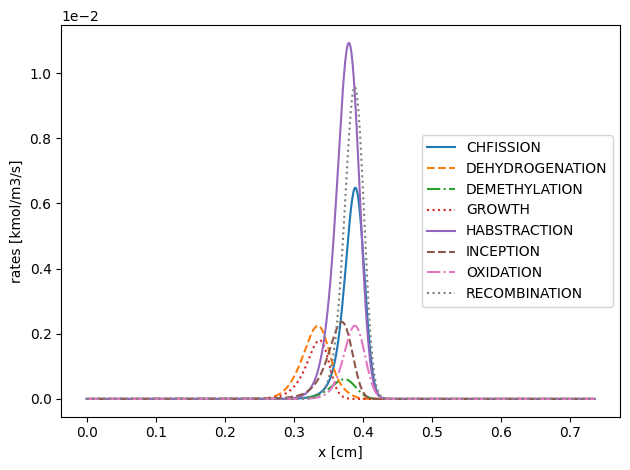

In [2]:
kin_xml_fld = os.path.join('..', 'data', 'Classes', 'kinetics-soot0')
simul_fld = os.path.join('..', 'data', 'Classes', 'Output-soot0')

# processes reaction rates by class - rates independent of a specific species
# counterflow flames
rxn_classes_file = os.path.join('..', 'data', 'Classes', 'rxn_class_groups-soot.txt')
# x_axis = 'csi'
x_axis = 'x'
sortlists = [['classtype']]
threshs = [1e-3]
filter_dcts = [{'classtype':['INCEPTION','GROWTH','COALESCENCE','AGGREGATION','CHFISSION','RECOMBINATION','DEHYDROGENATION','DEMETHYLATION','METHYLATION','HABSTRACTION','OXIDATION']}]

# assign class
rxns_sorted = script_utils.get_sortedrxns(kin_xml_fld, rxn_classes_file).rxn_class_df
# assign rates (get a list as long as the sorting criteria selected)
rates_byclass_list = script_utils.reactionrates_byclasses(
    simul_fld, kin_xml_fld, rxns_sorted, sortlists, x_axis, 
    filter_dcts = filter_dcts, threshs = threshs
)

# plot
for rates_byclass in rates_byclass_list:
    fig, ax = plot_areas(rates_byclass, 
                         ylabel = 'rates [kmol/m3/s]', 
                         xlabel = 'x [cm]',
                         fontsize = 10, loc = 'center right', plotlines = True)
    plt.show()

        


### Example 2: Premixed laminar flame
reactions filtered by list of classtypes

*Warning: attribute x not found. using "time" as default


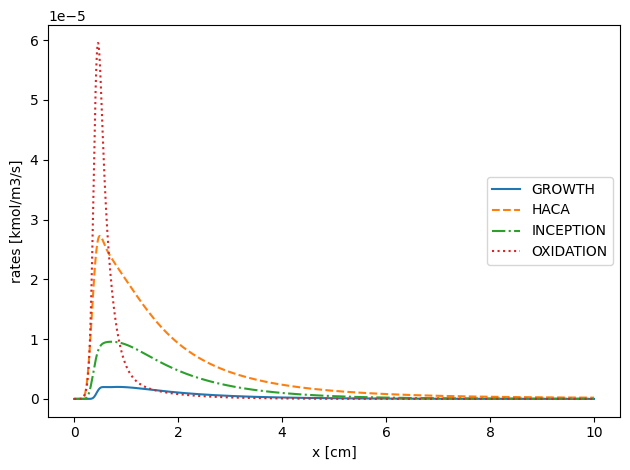

In [2]:
kin_xml_fld = os.path.join('..', 'data', 'Classes', 'kinetics-soot')
simul_fld =  os.path.join('..', 'data', 'Classes', 'F14')

# processes reaction rates by class - rates independent of a specific species
# counterflow flames
rxn_classes_file = os.path.join('..', 'data', 'Classes', 'rxn_class_groups-soot.txt')
# x_axis = 'csi'
x_axis = 'x'
sortlists = [['classtype']]
threshs = [1e-2]
filter_dcts = [{'classtype':['INCEPTION', 'HACA','GROWTH', 'OXIDATION']}]
species_list =['BIN5AJ','BIN5BJ','BIN5CJ',
               'BIN4AJ','BIN4BJ','BIN4CJ',
               'BIN3AJ','BIN3BJ','BIN3CJ','BIN3A','BIN3B','BIN3C',]
# assign class
rxns_sorted = script_utils.get_sortedrxns(kin_xml_fld, rxn_classes_file).rxn_class_df
# assign rates (get a list as long as the sorting criteria selected)
rates_byclass_list = script_utils.reactionrates_byclasses(
    simul_fld, kin_xml_fld, rxns_sorted, sortlists, x_axis, 
    filter_dcts = filter_dcts, threshs = threshs, filter_by_species = species_list
)

# plot
for rates_byclass in rates_byclass_list:
    fig, ax = plot_areas(rates_byclass, 
                         ylabel = 'rates [kmol/m3/s]', 
                         xlabel = 'x [cm]',
                         fontsize = 10, loc = 'center right', plotlines = True)
    plt.show()

        


### Example 2: PFR
reactions filtered by list of species and types of classes.
Analogous to example 2 in Reaction Classes

/home/chimica2/lpratali/anaconda3/envs/post-processor2/lib/python3.11/site-packages/pySMOKEPostProcessor/maps/OpenSMOKEppXMLFile.py:48: UserWarning:  * WARNING: You are running an older version of OpenSMOKE++ that is no longer mantained!
,Some of the functions in this class may not work!
  warnings.warn(


*Warning: attribute x not found. using "time" as default


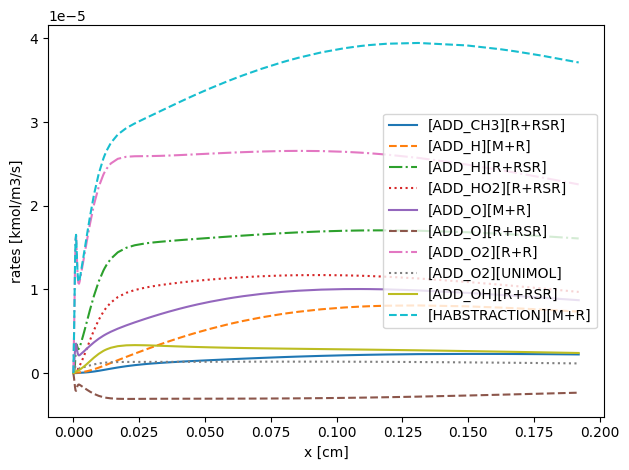

In [3]:
kin_xml_fld = os.path.join('..', 'data', 'Classes', 'kinetics')
simul_fld = os.path.join('..', 'data', 'Classes', 'simul', 'Output')
rxn_classes_file = os.path.join('..', 'data', 'Classes', 'rxn_class_groups.txt')

species_list =['C6H6','C6H5']
filter_dcts = [{'classtype':['ADD', 'HABS']}] # filter according to selected criteria in name
# thresh = 1e-3 # threshold for minimum flux
sortlists = [['classtype','bimoltype']] # classtype, speciestype, subclass, bimoltype (R+R, RSR+RSR, M+M, ETC) sum if both apply and sort by this criteria

x_axis = 'x'

# assign class
rxns_sorted = script_utils.get_sortedrxns(kin_xml_fld, rxn_classes_file).rxn_class_df
# assign rates (get a list as long as the sorting criteria selected)
rates_byclass_list = script_utils.reactionrates_byclasses(
    simul_fld, kin_xml_fld, rxns_sorted, sortlists, x_axis, 
    filter_dcts = filter_dcts, threshs = threshs
)

# plot
for rates_byclass in rates_byclass_list:
    fig, ax = plot_areas(rates_byclass, 
                         ylabel = 'rates [kmol/m3/s]', 
                         xlabel = 'x [cm]',
                         fontsize = 10, loc = 'center right', plotlines = True)
    plt.show()

        
